In [16]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [17]:
Consumer_Key = "hVR5LqvEj6gVz0aFjb2ZncujD"
Consumer_Secret_Key = "M6QUpMwZwPeUPZEOlQ0Rk2xX7i3Lux0DYcu67rQhkH4U56LUlB" 
Access_Token = "1205070840666062848-b2zhxJ23q7dLAtMCn06eq4emogwUEN"
Access_Token_Secret = "YY48zF7TsKAwu57vhHEL21gp3jBbZkxtzKssWm6ttILmH"

In [18]:
auth = tweepy.OAuthHandler(Consumer_Key,Consumer_Secret_Key)
auth.set_access_token(Access_Token,Access_Token_Secret)
api = tweepy.API(auth)

In [21]:
posts = api.user_timeline(screen_name="tokopedia", count = 2000, lang = "eng", tweet_mode = "extended")

print("Show the 10 recent tweets: \n")
i=1
for tweet in posts[:10]:
    print(str(i) +') '+ tweet.full_text + '\n')
    i=i+1

Show the 10 recent tweets: 

1) @thaliawlndr Aihh dikira Minto doang yang pernah ngerasa begini, ternyata kakaknya juga 🙌 tos kak

2) @isnansayyidinaa @ayubsr Gruo wa kak yang mager mah 😂

3) @amdsyafii_ @ayubsr Segini cuma kehapus 5 foto ya kak? 😁

4) @MZRRDP @ayubsr Quotes-quotes galau yak? Samaan kita 🙌

5) @xdnr_ @Shellaemeliana1 Tapi mending adu nasib tau, daripada dibilang "Alah lemah, baru juga gitu udah cengeng" 😭

6) @NissaAisattul @Shellaemeliana1 Wkwk kita senasib. Lah, kita senasib nih kak 😉

7) @nopbito @Shellaemeliana1 Bisa tauuu kak! Minto pernah kayak gitu pas lagi ngaca 😁

8) @Shellaemeliana1 Kalau kita cerita, terus ditanggepinnya "Lu mah mending, gue nih yak blablabla" itu tandanya temanmu sedang adu nasib ya gaess 😁✌

9) @mel_96812 @Shellaemeliana1 Eh ada kamu di sini 👀

10) @mrndalstr Kalau satu per satu mah "pakeeeettttt"



In [20]:
df = pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])
df.head()

,Tweets
0,@thaliawlndr Aihh dikira Minto doang yang pern...
1,@isnansayyidinaa @ayubsr Gruo wa kak yang mage...
2,@amdsyafii_ @ayubsr Segini cuma kehapus 5 foto...
3,@MZRRDP @ayubsr Quotes-quotes galau yak? Samaa...
4,@xdnr_ @Shellaemeliana1 Tapi mending adu nasib...


In [22]:
def cleanTxt(text):
  text = re.sub('@[A-Za-z0-9]+', '', text)
  text = re.sub('#', '', text)
  text = re.sub('RT[\s]+', '', text)
  text = re.sub('https?:\/\/\S+', '', text)

  return text

df['Tweets'] = df['Tweets'].apply(cleanTxt)

df

,Tweets
0,Aihh dikira Minto doang yang pernah ngerasa b...
1,Gruo wa kak yang mager mah 😂
2,_ Segini cuma kehapus 5 foto ya kak? 😁
3,Quotes-quotes galau yak? Samaan kita 🙌
4,"_ Tapi mending adu nasib tau, daripada dibila..."
...,...
195,Belanja di Tokopedia NOW! Bisa dapetin cashbac...
196,Akhir tahun saatnya update stok berbagai produ...
197,Kemarin pas natal dapet apa aja nih guys?? \n\...
198,Mau pengiriman cepat tapi takut harga ongkir b...


In [23]:
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
  return TextBlob(text).sentiment.polarity

df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

df

,Tweets,Subjectivity,Polarity
0,Aihh dikira Minto doang yang pernah ngerasa b...,0.0,0.0
1,Gruo wa kak yang mager mah 😂,0.0,0.0
2,_ Segini cuma kehapus 5 foto ya kak? 😁,0.0,0.0
3,Quotes-quotes galau yak? Samaan kita 🙌,0.0,0.0
4,"_ Tapi mending adu nasib tau, daripada dibila...",0.0,0.0
...,...,...,...
195,Belanja di Tokopedia NOW! Bisa dapetin cashbac...,0.0,0.0
196,Akhir tahun saatnya update stok berbagai produ...,0.0,0.0
197,Kemarin pas natal dapet apa aja nih guys?? \n\...,0.0,0.0
198,Mau pengiriman cepat tapi takut harga ongkir b...,0.0,0.0


<function matplotlib.pyplot.show(*args, **kw)>

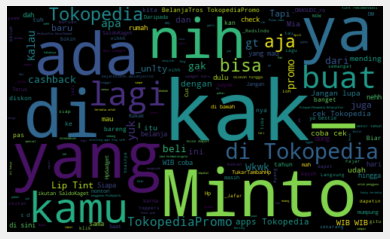

In [24]:
allwords = ' '.join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width=500, height=300, random_state=10, max_font_size=110).generate(allwords)

plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show

In [25]:
def getAnalysis(score):

  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'
df['Analysis'] = df['Polarity'].apply(getAnalysis)
df

,Tweets,Subjectivity,Polarity,Analysis
0,Aihh dikira Minto doang yang pernah ngerasa b...,0.0,0.0,Neutral
1,Gruo wa kak yang mager mah 😂,0.0,0.0,Neutral
2,_ Segini cuma kehapus 5 foto ya kak? 😁,0.0,0.0,Neutral
3,Quotes-quotes galau yak? Samaan kita 🙌,0.0,0.0,Neutral
4,"_ Tapi mending adu nasib tau, daripada dibila...",0.0,0.0,Neutral
...,...,...,...,...
195,Belanja di Tokopedia NOW! Bisa dapetin cashbac...,0.0,0.0,Neutral
196,Akhir tahun saatnya update stok berbagai produ...,0.0,0.0,Neutral
197,Kemarin pas natal dapet apa aja nih guys?? \n\...,0.0,0.0,Neutral
198,Mau pengiriman cepat tapi takut harga ongkir b...,0.0,0.0,Neutral


In [26]:
print('Printing negative tweets:\n')
j=i
sortedDF = df.sort_values(by=['Polarity'],ascending=False)
for i in range(0,sortedDF.shape[0] ):
  if( sortedDF['Analysis'][i] == 'Negative'):
    print(str(j) + ') '+sortedDF['Tweets'][i])
    print()
    j=j+1

Printing negative tweets:

11)  Warnanya yang pink kak? 😜

12) @_senimangila _RedsIndo Sorry g dulu 😁✌

13)   Apa prestasi ini ada kaitannya dengan Fajar sad boy kak? 😁✌



In [27]:
print('Printing positive tweets:\n')
j=i
sortedDF = df.sort_values(by=['Polarity'],ascending=True)
for i in range(0,sortedDF.shape[0] ):
  if( sortedDF['Analysis'][i] == 'Positive'):
    print(str(j) + ') '+sortedDF['Tweets'][i])
    print()
    j=j+1

Printing positive tweets:

199) _cimi  Terus buat top up gopay dan check out di Tokopedia deh 😘

200) Special menymabut tahun baru. 

Beli Alat olahraga di Sportacular bisa dapat cashback s.d 500rb 🤑
Good deals banget! 

Cus belanja di sini&gt; 

Autohobbies TokopediaPromo

201) _ady Hai Kak Zulkifli, silakan infokan kendala yang Kakak melalui DM dengan klik tombol "kirim pesan pribadi ke kami" di bawah ya  . Kami tunggu DM dari Kakak :)

202) _you Fajar selalu bikin mood Minto naikk. Love uu Fajar

203) : Focallure Jelly Clear Dewy Lip Tint✨


204) : Rekomendasi Lip Tint viral buat New Year dinner bareng Ayang 💕💕

✨A Thread✨

DilayaniTokopedia BelanjaTros RacunTokped ht…

205) Stay safe untuk Carat-deul yang nonton konser BeTheSunInJakarta hari iniii! Jangan lupa siapin ponco atau payung kecil, makan yang cukup juga supaya tetep berenergi❤️❤️ tokopedia tokopediachingu

206) Focallure Jelly Clear Dewy Lip Tint✨


207) Rekomendasi Lip Tint viral buat New Year dinner bareng Ayang 💕💕

✨A 

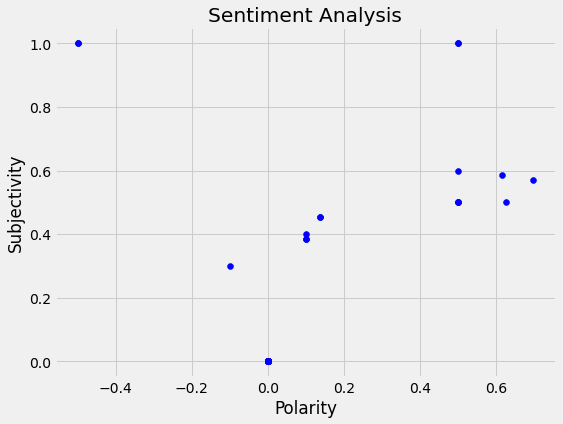

In [28]:
plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
  plt.scatter(df["Polarity"][i], df["Subjectivity"][i], color='Blue')

plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

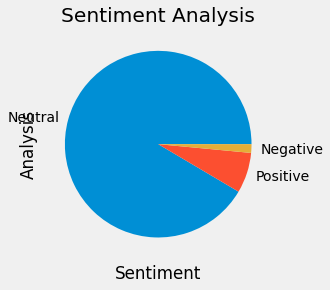

In [29]:
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='pie')
plt.show()

In [30]:
df['Analysis'].value_counts()

Neutral     183
Positive     14
Negative      3
Name: Analysis, dtype: int64